# importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import pymongo
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# laoding the models from mongo db and read them 

In [2]:
def load_data_from_db(client, db, dbconnection):
    myclient = pymongo.MongoClient(client)
    mydb = myclient[db]
    mycol = mydb[dbconnection]
    records=mycol.find()
    list_cr=list(records)
    for i in list_cr:
        for j in i['parameters']:
            i[j]=i['parameters'][j]
        del i['parameters']
    df=pd.DataFrame(list_cr)
    df['model']=df['model'].apply(lambda x: pickle.loads(x))
    return df

### loading the knn model from mongo db

In [3]:
loaded_data_frame_knn=load_data_from_db(client="mongodb://localhost:27017", db="parkinson_models", dbconnection="knn")
loaded_data_frame_knn

,_id,model,accuracy,model_name,dbconnection,algorithm,n_neighbors,p,weights
0,62dab5fff6b5f59ed7525895,KNeighborsClassifier(n_neighbors=9),0.966667,KNN_model_2,knn,auto,1,2,uniform


In [4]:
knn_classifier=loaded_data_frame_knn['model'][0]
knn_classifier

KNeighborsClassifier(n_neighbors=9)

### loading the svm model from mongo db

In [5]:
loaded_data_frame_svm=load_data_from_db(client="mongodb://localhost:27017", db="parkinson_models", dbconnection="svm")
loaded_data_frame_svm

,_id,model,accuracy,model_name,dbconnection,C,gamma,kernel
0,62dab636f6b5f59ed752589d,SVC(random_state=0),0.933333,SVM_model,svm,100,0.9,rbf


In [6]:
svm_classifier=loaded_data_frame_svm['model'][0]
svm_classifier

SVC(random_state=0)

### loading the knn model from mongo db

In [7]:
loaded_data_frame_rf=load_data_from_db(client="mongodb://localhost:27017", db="parkinson_models", dbconnection="rf")
loaded_data_frame_rf

,_id,model,accuracy,model_name,dbconnection,max_depth,max_features,n_estimators
0,62dab61ef6b5f59ed7525899,"(DecisionTreeClassifier(max_features='sqrt', r...",0.946667,RF_model_1,rf,10,7,20


In [8]:
rf_classifier=loaded_data_frame_rf['model'][0]
rf_classifier

RandomForestClassifier()

## Accuracy of all models side by side

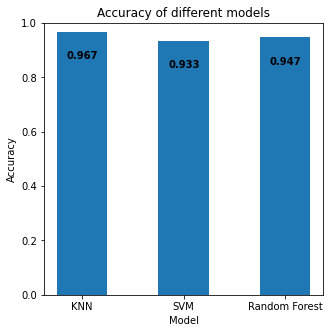

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_title("Accuracy of different models")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_xticklabels(["KNN", "SVM", "Random Forest"])
ax.set_ylim(0,1)
ax.set_xticks([0,1,2])
ax.bar([0,1,2],[loaded_data_frame_knn['accuracy'][0],loaded_data_frame_svm['accuracy'][0],loaded_data_frame_rf['accuracy'][0]],label='Accuracy', width=0.5)

for i,j in zip([0,1,2],[loaded_data_frame_knn['accuracy'][0],loaded_data_frame_svm['accuracy'][0],loaded_data_frame_rf['accuracy'][0]]):
    ax.text(i-0.15, j-0.1, str(j.round(3)), color='black', fontweight='bold')

plt.show()
